In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
sample_path = 'sample_submission_V2.csv' 
train_path = 'train_V2.csv'
test_path = 'test_V2.csv'
sample = pd.read_csv(sample_path)
train= pd.read_csv(train_path)
test=pd.read_csv(test_path)

In [4]:
df = pd.read_csv(train_path)
df = df.dropna()

In [5]:
len(df)

4446965

In [6]:
# 캐주얼, 노말 모드 drop
df= df[~(df['matchType'] =='flaretpp')&
   ~(df['matchType'] =='flarefpp')&
   ~(df['matchType'] =='crashfpp')&
   ~(df['matchType'] =='crashtpp')&
   ~(df['matchType'] =='normal-squad-fpp')&
   ~(df['matchType'] =='normal-solo-fpp')&
   ~(df['matchType'] =='normal-duo-fpp')&
   ~(df['matchType'] =='normal-duo')&
   ~(df['matchType'] =='normal-squad')&
   ~(df['matchType'] =='normal-solo')]

In [7]:
4446965- len(df)

35267

In [8]:
# matchid 60명 이하인 데이터 drop
matchId_drop = df['matchId'].value_counts().loc[df['matchId'].value_counts()>60].index
df = df.loc[df['matchId'].isin(matchId_drop)]

In [9]:
4411698 - len(df)

21120

In [10]:
df = df.drop(columns=['Id',
                 'killPoints',
                 'matchDuration',
                 'maxPlace',
                 'teamKills',
                 'roadKills',
                 'vehicleDestroys',
                ])

In [11]:
4446965-len(df)

56387

In [12]:
df.head()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchType,numGroups,rankPoints,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,0,0,0.00,squad-fpp,26,-1,0,0.0000,0.00,244.80,1,1466,0.4444
1,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0.00,squad-fpp,25,1484,0,0.0045,11.04,1434.00,5,0,0.6400
2,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0.00,duo,47,1491,0,0.0000,0.00,161.80,2,0,0.7755
3,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0.00,squad-fpp,30,1408,0,0.0000,0.00,202.70,3,0,0.1667
4,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,1,1,58.53,solo-fpp,95,1560,0,0.0000,0.00,49.75,2,0,0.1875


In [13]:
df.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,numGroups,rankPoints,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.320795,0.381309,0.293527,0.178576,0.229025,-0.292547,0.289479,0.235442,0.259560,-0.142002,-0.015256,0.200276,0.113961,0.025306,0.303068,0.201186,0.023185,0.305631
boosts,0.320795,1.000000,0.543124,0.367581,0.347071,0.537882,-0.559846,0.526497,0.409108,0.426833,-0.013450,0.024906,0.254041,0.328132,0.108669,0.641151,0.438643,-0.009191,0.636838
damageDealt,0.381309,0.543124,1.000000,0.752553,0.604221,0.346742,-0.693477,0.883841,0.709349,0.571708,-0.029477,0.000185,0.263227,0.146426,0.038969,0.415559,0.314943,0.016802,0.451453
DBNOs,0.293527,0.367581,0.752553,1.000000,0.477198,0.267519,-0.567619,0.726936,0.655769,0.458239,-0.271079,-0.002239,0.299877,0.104579,0.017927,0.291550,0.213896,0.010139,0.283813
headshotKills,0.178576,0.347071,0.604221,0.477198,1.000000,0.200940,-0.479952,0.666553,0.513405,0.451741,0.016832,0.006701,0.153245,0.080886,0.029728,0.261039,0.190310,0.003776,0.282488
heals,0.229025,0.537882,0.346742,0.267519,0.200940,1.000000,-0.388883,0.315921,0.270220,0.263536,-0.062739,0.020719,0.237194,0.298193,0.080473,0.432725,0.318993,-0.012457,0.430247
killPlace,-0.292547,-0.559846,-0.693477,-0.567619,-0.479952,-0.388883,1.000000,-0.753758,-0.817866,-0.545653,0.006566,-0.015372,-0.272722,-0.236068,-0.090788,-0.596849,-0.508468,-0.002028,-0.727385
kills,0.289479,0.526497,0.883841,0.726936,0.666553,0.315921,-0.753758,1.000000,0.813871,0.615337,0.006729,0.010405,0.261329,0.121091,0.041743,0.394206,0.294268,0.005455,0.431418
killStreaks,0.235442,0.409108,0.709349,0.655769,0.513405,0.270220,-0.817866,0.813871,1.000000,0.515426,-0.034482,0.004754,0.242892,0.099208,0.035169,0.330764,0.271247,0.007396,0.377422
longestKill,0.259560,0.426833,0.571708,0.458239,0.451741,0.263536,-0.545653,0.615337,0.515426,1.000000,-0.014304,0.018913,0.170806,0.192193,0.054308,0.417373,0.279032,-0.005419,0.412554


In [14]:
df['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo'],
      dtype=object)

EDA

Text(0.5, 1.0, 'weaponsAcquired')

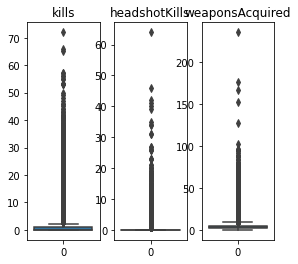

In [15]:
plt.subplot(1,4,1)
sns.boxplot(data=train['kills'])
plt.title('kills')
plt.subplot(1,4,2)
sns.boxplot(data=train['headshotKills'])
plt.title('headshotKills')
plt.subplot(1,4,3)
sns.boxplot(data=train['weaponsAcquired'])
plt.title('weaponsAcquired')



Text(0.5, 1.0, 'swimDistance')

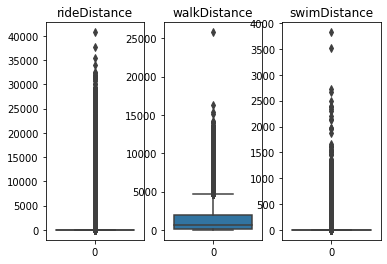

In [16]:
#Distance
plt.subplot(1,3,1)
sns.boxplot(data=train['rideDistance'])
plt.title('rideDistance')
plt.subplot(1,3,2)
sns.boxplot(data=train['walkDistance'])
plt.title('walkDistance')
plt.subplot(1,3,3)
sns.boxplot(data=train['swimDistance'])
plt.title('swimDistance')

Text(0.5, 1.0, 'swimDistance')

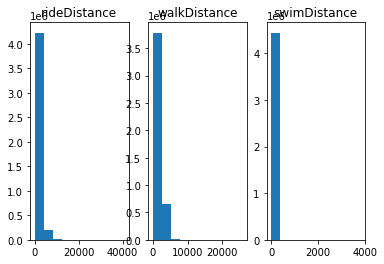

In [17]:
plt.subplot(1,3,1)
plt.hist(train['rideDistance'])
plt.title('rideDistance')
plt.subplot(1,3,2)
plt.hist(train['walkDistance'])
plt.title('walkDistance')
plt.subplot(1,3,3)
plt.hist(train['swimDistance'])
plt.title('swimDistance')
#rideDistance-15000,walkDistance-15000, swimDistance-2500

전처리

In [52]:
df_t = df.drop(columns=['groupId','matchId','rankPoints','winPoints','killPlace'])


In [46]:
# distance 이상치 제거
out=df_t['rideDistance']>20000.0
ride_drop=df_t[out].index
df_t=df_t.drop(ride_drop)
out=df_t['walkDistance']>15000.0
distance_drop=df_t[out].index
df_t=df_t.drop(distance_drop)
out=df_t['swimDistance']>2500.0
distance_drop=df_t[out].index
df_t=df_t.drop(distance_drop)

In [53]:
#합쳐보자
#df_t['totalDistance']=df_t['rideDistance']+df_t['walkDistance']+df_t['swimDistance']
#df_t=df_t.drop(columns=['rideDistance','walkDistance','swimDistance'])
df_t

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,numGroups,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,0,0,0.00,squad-fpp,26,0,0.0000,0.000,244.80,1,0.4444
1,0,0,91.47,0,0,0,0,0,0.00,squad-fpp,25,0,0.0045,11.040,1434.00,5,0.6400
2,1,0,68.00,0,0,0,0,0,0.00,duo,47,0,0.0000,0.000,161.80,2,0.7755
3,0,0,32.90,0,0,0,0,0,0.00,squad-fpp,30,0,0.0000,0.000,202.70,3,0.1667
4,0,0,100.00,0,0,0,1,1,58.53,solo-fpp,95,0,0.0000,0.000,49.75,2,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,0,0,0.00,squad-fpp,28,0,1292.0000,0.000,1019.00,3,0.1786
4446962,0,1,44.15,0,0,0,0,0,0.00,solo,93,0,0.0000,0.000,81.70,6,0.2935
4446963,0,0,59.06,0,0,0,0,0,0.00,squad-fpp,28,0,0.0000,2.184,788.70,4,0.4815
4446964,0,4,180.40,1,1,2,2,1,98.50,squad-fpp,25,2,0.0000,0.000,2748.00,8,0.8000


In [54]:
df_inco = pd.get_dummies(df_t['matchType'])
df_t = pd.concat([df_t,df_inco],axis=1)
df_t = df_t.drop(columns='matchType')
df_t

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,numGroups,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc,duo,duo-fpp,solo,solo-fpp,squad,squad-fpp
0,0,0,0.00,0,0,0,0,0,0.00,26,0,0.0000,0.000,244.80,1,0.4444,0,0,0,0,0,1
1,0,0,91.47,0,0,0,0,0,0.00,25,0,0.0045,11.040,1434.00,5,0.6400,0,0,0,0,0,1
2,1,0,68.00,0,0,0,0,0,0.00,47,0,0.0000,0.000,161.80,2,0.7755,1,0,0,0,0,0
3,0,0,32.90,0,0,0,0,0,0.00,30,0,0.0000,0.000,202.70,3,0.1667,0,0,0,0,0,1
4,0,0,100.00,0,0,0,1,1,58.53,95,0,0.0000,0.000,49.75,2,0.1875,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,0,0,0.00,28,0,1292.0000,0.000,1019.00,3,0.1786,0,0,0,0,0,1
4446962,0,1,44.15,0,0,0,0,0,0.00,93,0,0.0000,0.000,81.70,6,0.2935,0,0,1,0,0,0
4446963,0,0,59.06,0,0,0,0,0,0.00,28,0,0.0000,2.184,788.70,4,0.4815,0,0,0,0,0,1
4446964,0,4,180.40,1,1,2,2,1,98.50,25,2,0.0000,0.000,2748.00,8,0.8000,0,0,0,0,0,1


In [55]:
x=df_t.drop(columns='winPlacePerc')
y=df_t[['winPlacePerc']]

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3512462, 21), (878116, 21), (3512462, 1), (878116, 1))

In [57]:
# lightgbm 활용
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['metric'] = 'mae'
clf = lgb.train(params, d_train, 100)
pred = clf.predict(x_test)
mae=mean_absolute_error(y_test,pred)
print(format(mae,'.5f'))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.109873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1536
[LightGBM] [Info] Number of data points in the train set: 3512462, number of used features: 21
[LightGBM] [Info] Start training from score 0.473147
0.09677


In [25]:
# xgboost 활용
import xgboost
xgb_model = xgboost.XGBRegressor(
    eval_metric=mean_absolute_error
    ,random_state=42)

xgb_model.fit(x_train,y_train)

pred = xgb_model.predict(x_test)
mae = mean_absolute_error(y_test, pred)
print(format(mae,'.5f'))

0.09639


In [26]:
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000
